In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
data = pd.read_csv('startup data.csv')

# Target variable: map status to numeric
y = data['status'].map({'acquired': 1, 'closed': 0})
data = data[~y.isna()]
y = y.dropna()

# Features: ONLY the 9 numeric ones
features = [
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year',
    'relationships',
    'funding_rounds',
    'funding_total_usd',
    'milestones',
    'avg_participants'
]

X = data[features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Evaluate
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test)))

# Save model
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")


Train Accuracy: 1.0
Test Accuracy: 0.7978339350180506

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.60      0.68        98
           1       0.81      0.91      0.85       179

    accuracy                           0.80       277
   macro avg       0.79      0.75      0.77       277
weighted avg       0.80      0.80      0.79       277

Model saved as random_forest_model.pkl


   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at  closed_at first_funding_at last_funding_at  \
0   1/1/2007        NaN         4/1/2009        1/1/2010   
1   1/1/2000        NaN        2/14/20

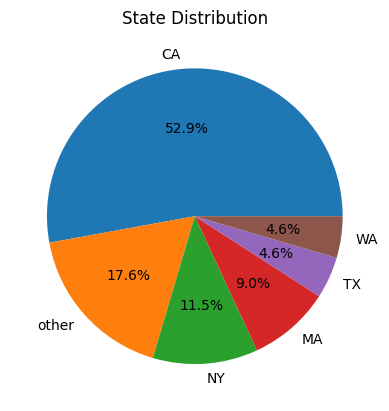

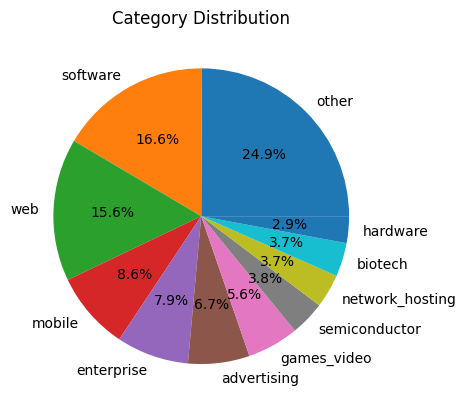

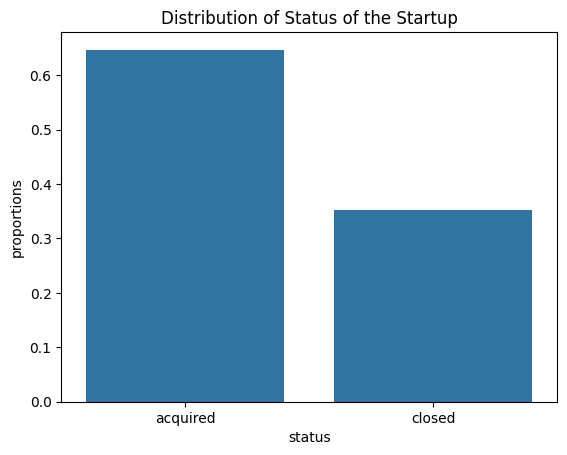

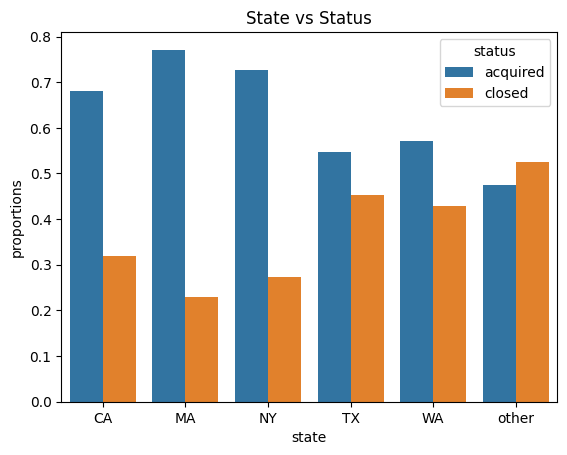

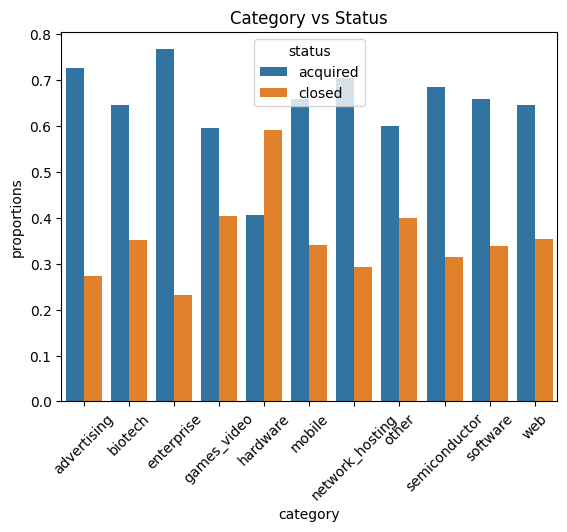

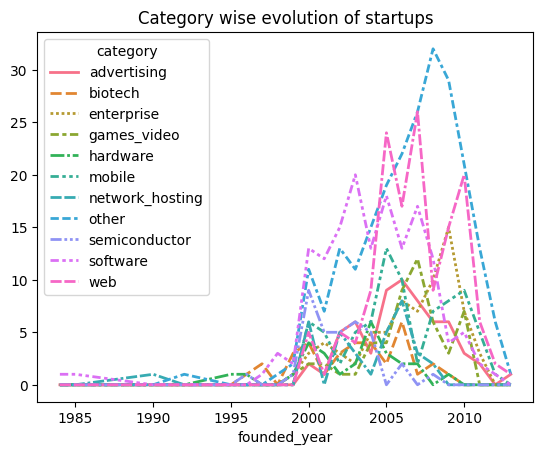

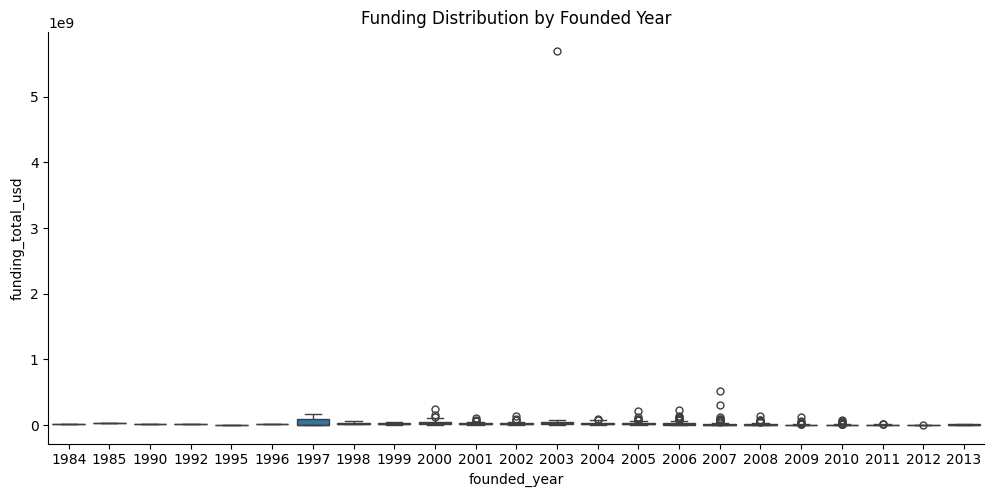

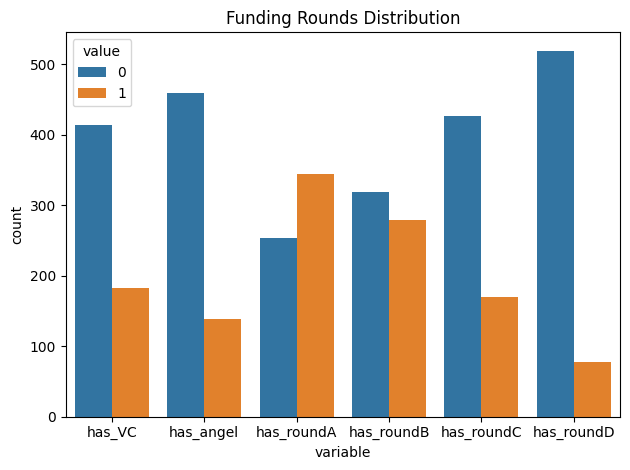

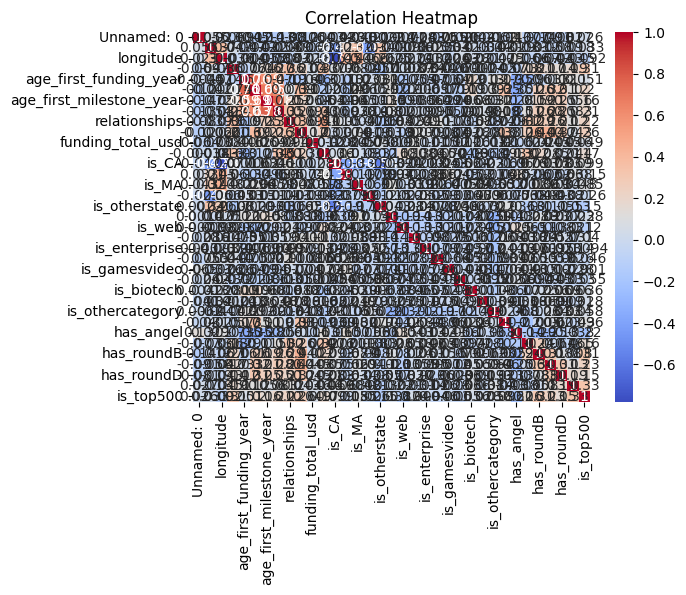

Feature matrix shape: (923, 9)
Train Accuracy: 1.0
Test Accuracy: 0.7978339350180506

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.60      0.68        98
           1       0.81      0.91      0.85       179

    accuracy                           0.80       277
   macro avg       0.79      0.75      0.77       277
weighted avg       0.80      0.80      0.79       277



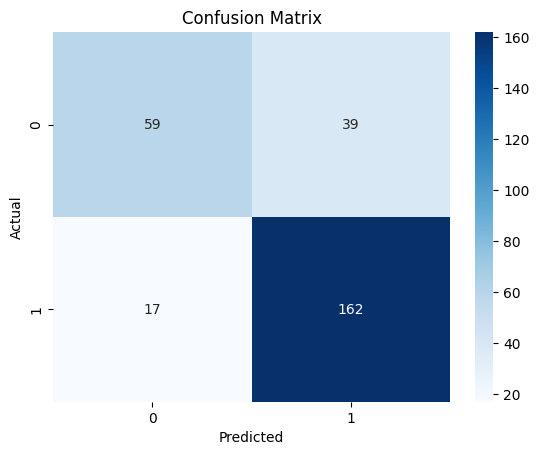

Model saved as random_forest_model.pkl


In [5]:
# ============================================
# Prosperity Prognosticator: Startup Success Prediction
# ============================================

# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================================
# Load Dataset
# ============================================
data = pd.read_csv('startup data.csv')
print(data.head())

# ============================================
# State Mapping
# ============================================
data['state'] = 'other'
data.loc[data['state_code'] == 'CA', 'state'] = 'CA'
data.loc[data['state_code'] == 'NY', 'state'] = 'NY'
data.loc[data['state_code'] == 'MA', 'state'] = 'MA'
data.loc[data['state_code'] == 'TX', 'state'] = 'TX'
data.loc[data['state_code'] == 'WA', 'state'] = 'WA'

# Pie chart of states
state_count = data['state'].value_counts()
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%')
plt.title("State Distribution")
plt.show()

# ============================================
# Category Mapping
# ============================================
data['category'] = 'other'
category_map = {
    'software': 'software',
    'web': 'web',
    'mobile': 'mobile',
    'enterprise': 'enterprise',
    'advertising': 'advertising',
    'games_video': 'games_video',
    'semiconductor': 'semiconductor',
    'network_hosting': 'network_hosting',
    'biotech': 'biotech',
    'hardware': 'hardware'
}
for k, v in category_map.items():
    data.loc[data['category_code'] == k, 'category'] = v

# Pie chart of categories
category_count = data['category'].value_counts()
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
plt.title("Category Distribution")
plt.show()

# ============================================
# Distribution of Startup Status
# ============================================
prop_df = data.groupby('status').size().reset_index(name='counts')
prop_df['proportions'] = prop_df['counts'] / prop_df['counts'].sum()

sns.barplot(data=prop_df, x='status', y='proportions')
plt.title('Distribution of Status of the Startup')
plt.show()

# ============================================
# State vs Status
# ============================================
prop_df = (
    data.groupby(['state', 'status'])
    .size()
    .reset_index(name='count')
)
prop_df['proportions'] = (
    prop_df['count'] /
    prop_df.groupby('state')['count'].transform('sum')
)

sns.barplot(data=prop_df, x='state', y='proportions', hue='status')
plt.title('State vs Status')
plt.show()

# ============================================
# Category vs Status
# ============================================
prop_df = (
    data.groupby(['category', 'status'])
    .size()
    .reset_index(name='counts')
)
prop_df['proportions'] = (
    prop_df['counts'] /
    prop_df.groupby('category')['counts'].transform('sum')
)

sns.barplot(data=prop_df, x='category', y='proportions', hue='status')
plt.title('Category vs Status')
plt.xticks(rotation=45)
plt.show()

# ============================================
# Category Evolution by Year
# ============================================
data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')
data['founded_year'] = data['founded_at'].dt.year

cat_year = pd.crosstab(index=data['founded_year'], columns=data['category'])
sns.lineplot(data=cat_year, lw=2)
plt.title('Category wise evolution of startups')
plt.show()

# ============================================
# Funding by Year (Boxplot)
# ============================================
sns.catplot(
    data=data,
    x="founded_year",
    y="funding_total_usd",
    kind="box",
    height=5,
    aspect=2
)
plt.title("Funding Distribution by Founded Year")
plt.show()

# ============================================
# VC/Angel/Round Counts
# ============================================
d = data[data['status'] == 'acquired']  # acquired startups
f = d[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]
sns.countplot(data=pd.melt(f), x="variable", hue="value")
plt.title("Funding Rounds Distribution")
plt.tight_layout()
plt.show()

# ============================================
# Correlation Heatmap
# ============================================
corr = data.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

# ============================================
# Preprocessing for Model
# ============================================
# Target variable
y = data['status'].map({'acquired': 1, 'closed': 0})
data = data[~y.isna()]
y = y.dropna()

# Features: ONLY the 9 numeric ones for Flask
features = [
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year',
    'relationships',
    'funding_rounds',
    'funding_total_usd',
    'milestones',
    'avg_participants'
]

X = data[features]
print("Feature matrix shape:", X.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ============================================
# Train Random Forest
# ============================================
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================================
# Save Model
# ============================================
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")
